In [1]:
from load_modules import *
import copy



CONCLUSION 

LOW FWHM IS SAVE, OTHERWISE HIGH WIDTH

In [2]:
np.arange(0.1,1,0.05), np.concatenate((np.linspace(0.99,0.83,8), .9 - np.logspace(-1,-0.15,15)))

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
        0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 array([0.99      , 0.96714286, 0.94428571, 0.92142857, 0.89857143,
        0.87571429, 0.85285714, 0.83      , 0.8       , 0.78499565,
        0.76773998, 0.74789522, 0.72507288, 0.6988262 , 0.66864136,
        0.63392749, 0.59400503, 0.54809246, 0.495291  , 0.43456703,
        0.36473182, 0.28441828, 0.19205422]))

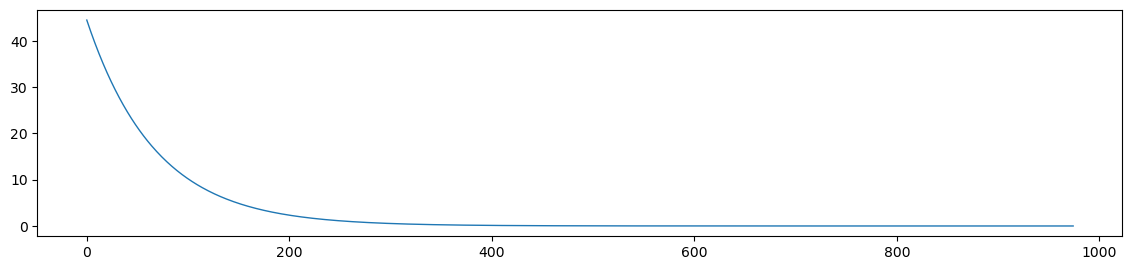

In [3]:
plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

n = 2000
x = np.arange(50, n, 2)

raw_lst = []
for _ in range(100):
    photo = np.random.uniform(10,20) * np.exp(np.linspace(1,np.random.uniform(-10,-20),len(x))) + np.random.uniform(50,100)
    raw = copy.copy(photo)
#     for _ in range(25):
#         FWHM_spike = np.random.uniform(7,50)
#         raman_mu = int(n*np.random.uniform(0.1,0.9))
#         raw +=  np.random.uniform(10,20) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
    raw_lst.append((raw, photo))
raw_lst = np.array(raw_lst)

for raw,_ in raw_lst:
    plt.plot(raw)
    plt.show()
    break

In [4]:
error_lst = []
FWHM_RBF_lst = range(100,1001,50)
width_lst = np.concatenate((np.linspace(0.99,0.83,8), .9 - np.logspace(-1,-0.15,15)))
# width_lst = np.arange(0.1,1,0.05)
for FWHM_RBF in FWHM_RBF_lst:
    for width in width_lst:
        e = 0
        for raw, photo in raw_lst:
            LS = LSQ.photo_approximation(x, -1, FWHM_RBF, len(x), width=width)
            appr = LS(raw)            
            e += error.MSE(appr, photo)
            
#             print(FWHM_RBF, width, LS.RBF.shape, e)
#             plt.plot(appr.reshape(-1))
#             plt.plot(raw)
#             plt.plot(photo)
# #             plt.ylim(0,80)
#             plt.show()
#             break
        error_lst.append(e/len(raw_lst))

error_lst = np.array(error_lst).reshape(len(FWHM_RBF_lst), -1)

14 0
800 0.99
1.6030828623095014e-12
best avg width 0.99
best avg width FWHM 800 1.6030828623095014e-12


Text(0, 0.5, 'FWHM')

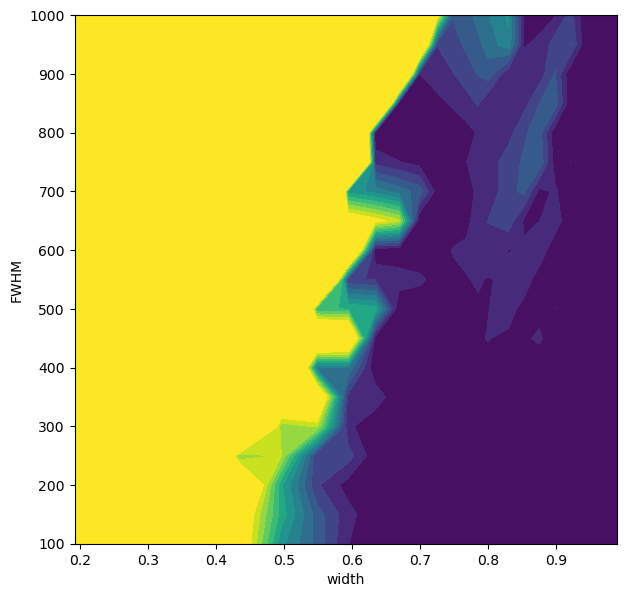

In [5]:
l = len(width_lst)
print(np.argmin(error_lst)//l, np.argmin(error_lst)%l)
print(FWHM_RBF_lst[np.argmin(error_lst)//l], width_lst[np.argmin(error_lst)%l])
print(np.min(error_lst))

print("best avg width", width_lst[np.argmin(np.sum(error_lst, 0))])

print("best avg width FWHM", FWHM_RBF_lst[np.argmin(error_lst[:,np.argmin(np.sum(error_lst, 0))])], np.min(error_lst[:,np.argmin(np.sum(error_lst, 0))]))

# plt.imshow(np.log(error_lst), cmap="gray", vmin=np.min(np.log(error_lst)), vmax=np.max(np.log(error_lst)))
# plt.show()
error_show = error_lst
X, Y = np.meshgrid(width_lst, FWHM_RBF_lst)
Z = np.log(error_show-np.min(error_show)+1)
# Z = np.log(error_show)
# Z = error_show

plt.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

fig = plt.figure()
ax = plt.axes()
# ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', shade=False)

# cset = ax.contourf(X, Y, Z,
#                    zdir ='z',
#                    offset = np.min(Z),
#                    cmap = 'viridis')
cset = ax.contourf(X, Y, Z, levels=100, cmap = 'viridis', vmax=1, vmin=np.min(Z))
# cset = ax.contourf(X, Y, Z, levels=200, cmap = 'viridis')

# ax.set_xlim(0,1)
# ax.set_ylim(1000,0)
ax.set_xlabel('width')
ax.set_ylabel('FWHM')
# ax.set_zlabel('MSE')


In [6]:
# for i,j in zip(*np.where(error_lst < 0.1)):
#     print(width_lst[j], FWHM_RBF_lst[i], error_lst[i,j])